In [1]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache c:\users\david\appdata\local\temp\jieba.cache
DEBUG:jieba:Dumping model to file cache c:\users\david\appdata\local\temp\jieba.cache
Loading model cost 2.01600003242 seconds.
DEBUG:jieba:Loading model cost 2.01600003242 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


大
巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認


In [5]:
import jieba

jieba.load_userdict("userdict.txt")

In [6]:
import jieba

sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


In [7]:
import jieba
jieba.del_word('柯P')
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word
jieba.add_word('柯P',100, 'nr')
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
for word in words:
    print word

大巨蛋
案對
市府
同仁
下
封口令
？
　
柯
P
否認
大巨蛋
案對
市府
同仁
下
封口令
？
　
柯P
否認


In [8]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag


大巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯P nr
否認 v


In [11]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 10)
print ",".join(tags)
tags = jieba.analyse.extract_tags(sentence, 10, allowPOS = ['nr'])
print ",".join(tags)


封口令,案對,大巨蛋,否認,柯P,市府,同仁
柯P,同仁


In [13]:
import jieba.analyse
jieba.analyse.set_stop_words("stopword.txt")

sentence = "根據歐洲電商組織(Ecommerce Europe) 最新消息得知，\
該集團積極讓歐洲的包裹遞送服務與電商領域有更緊密結合。如此一來，\
便可解決電商物流的障礙。此組織總共結合歐洲 16 國的電商協會，\
目標整合歐洲的包裹物流市場，讓商品跨境更為順暢"
tags = jieba.analyse.extract_tags(sentence)
print '/'.join(tags)


歐洲/電商/組織/包裹/物流/一來/領域/遞送/緊密/Europe/市場/順暢/根據/決電商/服務/集團/障礙/積極/目標/更為


In [34]:
import sqlite3
import jieba
db = sqlite3.connect('news.db') 
cur = db.cursor()
sentenceAry = [] 
cur.execute('select * from news_entry')
allNews = cur.fetchall()
dic = {}
for rec in allNews:
    words = jieba.cut(rec[4])
    sentenceAry.append(rec[4].encode('utf-8'))
    for w in words:
        if w not in dic:
            dic[w] = 1
        else:
            dic[w] = dic[w] + 1
cur.close()
db.close()

#for word in dic:
#    print word, dic[word]

In [35]:
from operator import itemgetter
swd = sorted(dic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[1:50] if w[0] not in ' 「」！：？【】...'.decode('utf-8')]
for ele in swd[0:100]:
    if len(ele[0]) >= 2:
        print ele[0], ele[1]

更新 49
悠遊卡 16
波多野 14
法廣 13
RFI 13
網友 12
台灣 11
閱兵 10
結衣 9


In [36]:
def ngram(input_sentence, n = 2):
    word_dic = {}
    sentence  = input_sentence.decode('utf-8')
    for i in range(0, len(sentence) - n + 1):
        if sentence[i:i+n] not in word_dic:
            word_dic[sentence[i:i+n]] = 1
        else:
            word_dic[sentence[i:i+n]] = word_dic[sentence[i:i+n]] + 1
    return word_dic

def removeKey(text, keyword):
    textAry= text
    for key in keyword:
        textAry = ''.join(textAry.split(key))
    return textAry

In [42]:
keywords=[]        
ret_terms={}
words_freq    = []
for term_length in range(5,1,-1):
    word_dic = {}
    for sentence in sentenceAry:
        text_list = removeKey(sentence,keywords)        
        ngram_words = ngram(text_list,term_length) 
        for word in ngram_words:
            if word not in word_dic:
                word_dic[word] = 1
            else:
                word_dic[word] += ngram_words[word]   
    for word in word_dic:
        if word_dic[word] >= 5:
            keywords.append(word.encode('utf-8'))            
            ret_terms.update({word:word_dic[word]})

for ele in ret_terms:
    print ele, ret_terms[ele]

　國 5
　小 7
　「 12
廣RFI】 13
了！ 5
直擊 5
8億 5
片　5
點　6
多野悠遊卡 7
悠遊卡 12
食品 5
國道 5
【】 13
20 7
波多野悠遊 7
台灣 16
金鐘 5
這樣 6
北京 5
　2 6
　3 9
　1 6
的人 5
　男 5
網友 6
... 95
   17
AV女優 8
　李 5
億元 5
　民眾 6
記者 6
影片 6
股價 6
　警 6
　網友 7
年　5
大雨 5
11 5
10 12
13 5
15 5
17 5
18 10
.... 6
槍手 6
閱兵　7
國民 5
台股 5
少女 6
代言 5
北市 5
！　8
【民報 5
0億 5
80 5
連戰 8
？　8
【法廣RF 13
00 14
美記者 6
閱兵 5
時代 6
曝光 8
募兵 5
人　5
40 5
市場 5
釣魚 5
處理 5
0萬 10
是... 5
：不 5
台北 6
0元 5
手　6
　他 7
中國 9
經濟 6
案　7
波多野結衣 8
【更新】 48
60 6
」　11
0年 5
【公庫】 5
30 5
槍擊 6
法廣RFI 13
自拍 6
　台 7
柯P 6
什麼 7


In [65]:
from IPython.display import display, HTML 

page= '''
  <head>
    <title>Word Cloud</title>
    <script src="tagcanvas.min.js" type="text/javascript"></script>
  </head>
  <body>
    <h1>Word Cloud</h1>
    <div id="myCanvasContainer">
      <canvas width="300" height="300" id="myCanvas">
        <p>Anything in here will be replaced on browsers that support the canvas element</p>
      </canvas>
    </div>
    <div id="tags"><ul id="weightTags">%s</ul></div>
  </body>
'''

js = '''
TagCanvas.Start('myCanvas','weightTags', {
 textFont: null,
 textColour: null,
 weight: true,
 shape: 'hcylinder',
 weightMode: 'both',
 textFont: 'Impact,"Arial Black",sans-serif',
 /* more options */
 
});
$('#tags').css('display','None');
'''
#sphere, hcylinder for a cylinder that starts off horizontal, vcylinder for a cylinder that starts off vertical, hring
import IPython
from IPython.core.display import display_html, display_javascript, Javascript

js_libs = ['tagcanvas.min.js']
li_str = ''
for li in ret_terms:
    li_str += '<li><a data-weight="1" style="font-size: %sem">%s</a></li>'%(li[1] , li[0])
    

import re    
for li in ret_terms:
    if (re.match(ur'^[\u4e00-\u9fff]+$',li) and ('更新' not in li.encode('utf-8'))):
        #print li, ret_terms[li]
        li_str += '<li><a data-weight="1" style="font-size: %s">%s</a></li>'%(ret_terms[li], li)

    
display_html(IPython.core.display.HTML(data=page%(li_str)))
display_javascript( Javascript(data=js, lib= js_libs))

Word Cloud 
 
 
 
 Word Cloud 
 
 
 Anything in here will be replaced on browsers that support the canvas element 
 
 
 　 　 　 廣 了 直 8 片 點 多 悠 食 國 【 2 波 台 金 這 北 　 　 　 的 　 網 . A 　 億 　 記 影 股 　 　 年 大 1 1 1 1 1 1 . 槍 閱 國 台 少 代 北 ！ 【 0 8 連 ？ 【 0 美 閱 時 曝 募 人 4 市 釣 處 0 是 ： 台 0 手 　 中 經 案 波 【 6 」 0 【 3 槍 法 自 　 柯 什 直擊 多野悠遊卡 悠遊卡 食品 國道 波多野悠遊 台灣 金鐘 這樣 北京 的人 網友 億元 記者 影片 股價 大雨 槍手 國民 台股 少女 代言 北市 連戰 美記者 閱兵 時代 曝光 募兵 市場 釣魚 處理 台北 中國 經濟 波多野結衣 槍擊 自拍 什麼

Automatically created module for IPython interactive environment
fitting to HMM and decoding ...

C:\Python27\lib\site-packages\matplotlib\finance.py:485: MatplotlibDeprecationWarning: This function has been deprecated in 1.4 in favor of `quotes_historical_yahoo_ochl`, which maintains the original argument order, or `quotes_historical_yahoo_ohlc`, which uses the open-high-low-close order. This function will be removed in 1.5
  mplDeprecation)
C:\Python27\lib\site-packages\sklearn\utils\__init__.py:76: DeprecationWarning: Class _BaseHMM is deprecated; WARNING: The HMM module and its function will be removed in 0.17as it no longer falls within the project's scope and API. It has been moved to a separate repository: https://github.com/hmmlearn/hmmlearn
  warnings.warn(msg, category=DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\utils\__init__.py:94: DeprecationWarning: Function normalize is deprecated; WARNING: The HMM module and its functions will be removed in 0.17 as it no longer falls within the project's scope and API. It has been moved to a separate repository: https:

done

Transition matrix
[[  8.20336573e-01   2.92500235e-02   1.49594481e-01   8.17348994e-04
    1.57302705e-06]
 [  3.28428130e-02   6.27447914e-01   3.15723068e-01   1.45943762e-16
    2.39862047e-02]
 [  1.54774905e-01   1.18363668e-01   7.19363504e-01   3.95270377e-03
    3.54521884e-03]
 [  2.39365781e-03   7.12377891e-18   4.81337138e-09   9.76730630e-01
    2.08757079e-02]
 [  3.61685488e-18   3.23401551e-01   2.89730349e-17   2.63419569e-01
    4.13178880e-01]]

means and vars of each hidden state
0th hidden state
mean =  [  5.80396738e-03   4.91215819e+07]
var =  [  4.20176590e-02   1.09646057e+14]

1th hidden state
mean =  [  3.40015224e-02   1.10482864e+08]
var =  [  1.63911968e-01   8.82357068e+14]

2th hidden state
mean =  [  1.05992750e-02   6.99276534e+07]
var =  [  1.03252931e-01   1.52890452e+14]

3th hidden state
mean =  [  2.53728580e-02   4.96950117e+07]
var =  [  7.37783502e-01   2.50374070e+14]

4th hidden state
mean =  [ -7.04299259e-01   1.49184807e+08]
var =  

C:\Python27\lib\site-packages\sklearn\utils\__init__.py:94: DeprecationWarning: Function normalize is deprecated; WARNING: The HMM module and its functions will be removed in 0.17 as it no longer falls within the project's scope and API. It has been moved to a separate repository: https://github.com/hmmlearn/hmmlearn
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
import jieba
jieba.add_word('柯P',100, 'nr')
jieba.add_word('洪智坤',100, 'nr')
#jieba.del_word('柯P')
#jieba.del_word('洪智坤')
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:

    corpus.append(' '.join(jieba.cut(title)))

In [75]:
print corpus
for ele in corpus:
    print ele

[u'\u3010 \u66f4\u65b0 \u3011 \u67efP \uff1a \u6d2a\u667a\u5764 \u6d29\u6f0f \u516c\u6587 \u6848\u9084 \u6c92 \u770b\u5230 \u516c\u6587 \u3000 \u4eca\u8655\u7406', u'\u7559 \u6d2a\u667a\u5764   \u67ef \uff1a \u6b98\u969c \u6c42\u8077 \u4e0d\u6613', u'\u4eba\u4e8b \u8655\u8b70 \u8655 \u6d2a\u667a\u5764 \u3000 \u67efP \uff1a \u4e0d \u6e05\u695a \u8b70\u8655 \u7d50\u679c']
【 更新 】 柯P ： 洪智坤 洩漏 公文 案還 沒 看到 公文 　 今處理
留 洪智坤   柯 ： 殘障 求職 不易
人事 處議 處 洪智坤 　 柯P ： 不 清楚 議處 結果


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 


X = vectorizer.fit_transform(corpus)
#print X
word = vectorizer.get_feature_names() 
#for w in word:
#    print w
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
for title in ary:
    print title


word = vectorizer.get_feature_names() 
for w in word:
    print w,
print 

print X.toarray()    


【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理
留洪智坤 柯：殘障求職不易
人事處議處洪智坤　柯P：不清楚議處結果
不易 人事 今處理 公文 更新 柯p 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 處議 議處
[[0 0 1 2 1 1 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1]]


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
print weight


[[ 0.          0.          0.31738473  0.63476946  0.31738473  0.24137927
   0.31738473  0.          0.          0.31738473  0.18745253  0.
   0.31738473  0.          0.          0.        ]
 [ 0.54645401  0.          0.          0.          0.          0.          0.
   0.54645401  0.54645401  0.          0.32274454  0.          0.          0.
   0.          0.        ]
 [ 0.          0.41074684  0.          0.          0.          0.31238356
   0.          0.          0.          0.          0.2425937   0.41074684
   0.          0.41074684  0.41074684  0.41074684]]


In [33]:
from sklearn.metrics.pairwise import linear_kernel
print linear_kernel(tfidf[0], tfidf)
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
#print cosine_similarities

cosine_similarities = linear_kernel(tfidf, tfidf)
print cosine_similarities

[[ 1.          0.06049928  0.12087772]]
[[ 1.          0.06049928  0.12087772]
 [ 0.06049928  1.          0.07829579]
 [ 0.12087772  0.07829579  1.        ]]


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print vectorizer.get_feature_names()
print(X.toarray())
#print(X.toarray().transpose())

[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']
[[1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0]]


In [46]:
posts = [open(os.path.join('toy', f)).read() for f in os.listdir('toy')]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())


#samples: 5, #features: 25
[u'about', u'actually', u'capabilities', u'contains', u'data', u'databases', u'images', u'imaging', u'interesting', u'is', u'it', u'learning', u'machine', u'most', u'much', u'not', u'permanently', u'post', u'provide', u'safe', u'storage', u'store', u'stuff', u'this', u'toy']


In [47]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print new_post_vec
print(new_post_vec.toarray())


  (0, 5)	1
  (0, 7)	1
[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [48]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())


In [50]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())

In [51]:
import sys
best_doc = None
best_dist = sys.maxint
best_i = None
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print "=== Post %i with dist=%.2f: %s"%(i, d, post)
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))


=== Post 0 with dist=4.00: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=1.73: Imaging databases provide storage capabilities.
=== Post 2 with dist=2.00: Most imaging databases safe images permanently.
=== Post 3 with dist=1.41: Imaging databases store data.
=== Post 4 with dist=5.10: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist=1.41


In [52]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
sorted(vectorizer.get_stop_words())[0:10]


['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [54]:
import nltk.stem
s= nltk.stem.SnowballStemmer('english')
print s.stem("graphics")

print s.stem("imaging")
print s.stem("image")
print s.stem("imagination")
print s.stem("imagine")


graphic
imag
imag
imagin
imagin


In [61]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print vectorizer.get_feature_names()
print X_train.toarray()

[u'actual', u'capabl', u'contain', u'data', u'databas', u'imag', u'interest', u'learn', u'machin', u'perman', u'post', u'provid', u'safe', u'storag', u'store', u'stuff', u'toy']
[[1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
 [0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 2 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0 0 0 3 0 0]]


In [65]:
posts = [open(os.path.join('toy', f)).read() for f in os.listdir('toy')]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

vectorizer2 = StemmedCountVectorizer(min_df=1, stop_words='english')
X_train2 = vectorizer.fit_transform(posts)

print vectorizer.get_feature_names()
print X_train.toarray()

print vectorizer2.get_feature_names()
print X_train2.toarray()

[u'about', u'actually', u'capabilities', u'contains', u'data', u'databases', u'images', u'imaging', u'interesting', u'is', u'it', u'learning', u'machine', u'most', u'much', u'not', u'permanently', u'post', u'provide', u'safe', u'storage', u'store', u'stuff', u'this', u'toy']
[[1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]]


NotFittedError: StemmedCountVectorizer - Vocabulary wasn't fitted.

In [79]:
a = '【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理'

#print '柯P' in a
mat = ['柯P', '洪智坤', '洪秀柱']
for w in mat:
    print w in a


True
True
False


In [102]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf


a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]
print set(a)
print set(abb)
print set(abc)

#print abb.count('a')
#print abb.count('b')
n_a = abb.count('b')
sum_ele = 0
for w in set(abb):
    sum_ele += abb.count(w)
print float(n_a) / sum_ele


print float(abb.count('a')) # n_a  
print sum(abb.count(w) for w in set(abb)) # sum_ele
tf =  float(abb.count('a')) / sum(abb.count(w) for w in set(abb))
print tf

print len(D)
print len([doc for doc in D if 'a' in doc])
print len(D) / len([doc for doc in D if 'a' in doc])
idf =  sp.log( len(D) / len([doc for doc in D if 'a' in doc]))
print tf * idf
'''
print(tfidf("a", a, D))
print(tfidf("b", abb, D))
print(tfidf("a", abc, D))
print(tfidf("b", abc, D))
print(tfidf("c", abc, D))
'''


set(['a'])
set(['a', 'b'])
set(['a', 'c', 'b'])
0.666666666667
1.0
3
0.333333333333
3
3
1
0.0


'\nprint(tfidf("a", a, D))\nprint(tfidf("b", abb, D))\nprint(tfidf("a", abc, D))\nprint(tfidf("b", abc, D))\nprint(tfidf("c", abc, D))\n'

In [105]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf

a, abb, abc, ddd = ["a"], ["a", "b", "b"], ["a", "b", "c"], ['d','d', 'd']
D = [a, abb, abc, ddd]

print(tfidf("a", a, D))
print(tfidf("b", abb, D))
print(tfidf("a", abc, D))
print(tfidf("b", abc, D))
print(tfidf("c", abc, D))
print(tfidf("d", ddd, D))

0.287682072452
0.462098120373
0.0958940241506
0.231049060187
0.462098120373
1.38629436112


In [108]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1434435247.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()

In [111]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse
ary = []
corpus=[]
for elem in events.findall('./channel/item'):
    title = elem.find('title').text
    description = elem.find('description').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))

In [114]:
print len(ary)
for ele in corpus[0:10]:
    print ele,

832
五月天 林憶蓮 堅持 改編 曲目 演唱 文擔 邀來 倪凱 Mayday 26 22 一種 預計 沒有 感動 極限 記者 網友 橫跨 div br 檢警 報導 記憶卡 林真米 劉志勤 白骨 兩人 日報 時報 自殺 偵辦 發現 夫婦 反應 檢察官 蘋果 犯案 照片 銀行團 市府 遠雄 接管 說明 機構 融資 巨蛋 合約 規定 決定 違約 改善 台北市 通知 柯文 柯市 媒體訪 終止 精準 港灣 高雄 論壇 檀香山 城市 2016 高雄市 夏威夷 發展 參加 全球 伊芸 邀約 菊訪 競爭力 舉辦 機會 國際 市政府 此行 訪者 評價 負面 給予 MERS 調查 比率 從受 首爾 地區 人數 中東 顯示 症候群 支持 信任 呼吸 更換 韓聯合 姜遠珍 div 少女 br 未成年 日報 報導 臉書 蘋果 生性 明知 全案 來源 見面 圖片 讀國 幾歲 資料 私訊問 透過 質疑 div br 10 穿著 配西裝 反戴 白襪 棒球帽 褲頭 NG 男生 惹人嫌 帆布鞋 露出 失分 倒胃口 隱若現 資料 這些 破舊 OneWeb 集團 高通公司 衛星 人造 維珍 布蘭森 Ltd 空中巴士 Group 15 計畫 資金 大約 魏勒 中央社 太空 董事 英國海峽 執行長 中選會 立委 對此 選舉 16 劉義周 依法行事 阻擋 柯建銘 記者 選會 國民黨 民進 回應 黨籍 總統 這種 報導 決定 黨團 0.5 張數 股為 股跌 名個 盤中 0.6 股漲 收盤 跌幅 台北 下跌 成交 9614 783.88 1.2 開盤 761 0.4 日電


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 
for ele in word[-50:-1]:
    print ele, 
print len(word)


麻六甲 麻六甲海 麻煩 麻痺 黎女 黎姓 黎明 黑人 黑煙 黑田 黑箱 黑色 黑色素瘤 黑衣 黑道 默特薩克 默默耕耘 點了 點亮 點參觀 點多 點或 點的 點聲明 點開出 點隊伍 點點 黨出 黨國大 黨團 黨產 黨籍 黨議員 黨部 黴菌 鼓勵 鼓勵員警 鼓棒 鼓陣 鼻酸 龍潭 龍舟 龍舟賽 龍華 龍達 龍達魯西 龐大 龐建國 龐德 7697


In [125]:
print X.shape

(832, 7697)


In [130]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 
print weight


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [229]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf, tfidf)
#print cosine_similarities.shape
#print cosine_similarities

n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
#print n_cosine_similarities.shape
#print n_cosine_similarities

one_cosine_similarities = linear_kernel(tfidf[0], tfidf)
#print one_cosine_similarities

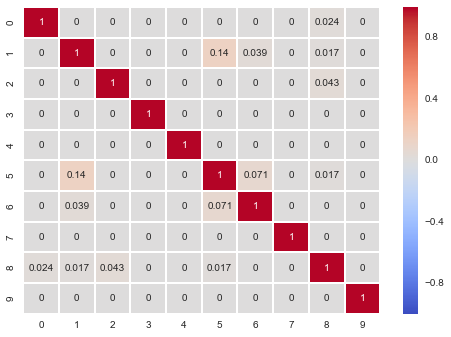

In [136]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# pip install seaborn
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')


In [164]:
a = [5,2,4,8,1]
#a.sort()
import numpy as np
print np.array(a).argsort() 
a.sort()
print a

[4 1 2 0 3]
[1, 2, 4, 5, 8]


In [180]:
one_cosine_similarities = linear_kernel(tfidf[0], tfidf)
related_docs_indices = one_cosine_similarities.argsort().flatten()
print related_docs_indices[-20:-1]
for index in related_docs_indices[:-20:-1]:
    print ary[index], index,one_cosine_similarities[0][index]


 [293 127  43 105 369 294 764 590 614 190 545 561 387 630 830  88 197 695
 534]
女版五月天爆神祕　22萬人猜不中夢幻十神 0 1.0
聽聲辨人 五月天要粉絲猜看看 534 0.170866474588
林憶蓮寫歌 金曲傳遞溫暖 695 0.0996316759108
《舞力麥克：尺度極限XXL》電影搶票活動 197 0.0944722225391
小辣椒／跟謝長廷的關係　洪秀柱：一個小夫、一個 88 0.0772349479907
【和平&#8231;中立&#8231;新台灣講堂】親美．友日 830 0.0767749409975
彭佳慧吃好睡好 備戰周六演唱 630 0.0645853556716
中捷可望復工 台中議員要柯文哲來報告 387 0.0594950163973
中華職棒／林子崴等3球員將報名參加選秀 561 0.0569912803846
協商破局 修憲今最後闖關 545 0.054390426001
「有本事你就殺了我吧！」富江年底襲台 190 0.0534199979359
法國警告希臘退出歐元的危機已迫在眉睫 614 0.0501734619131
傑布宣布參選總統 和「布希」劃清界線 590 0.0486369279422
瑪莎希臘摟新娘 李宗盛見證幸福 764 0.048224950767
台數科：澄清鉅亨網報導 294 0.0482205855939
訊映：說明有關104/06/16工商時報之報導 369 0.0481435471583
頭皮降溫有助改善化療病患掉髮 105 0.0476703735846
封殺令現曙光?　《小時代4》預告柯震東現身 43 0.0475187962369
封殺令現曙光?　《小時代4》預告柯震東現身 127 0.0475187962369


In [216]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=10)
weight = tfidf.toarray() 
k_data = c.fit_predict(weight)
print c.inertia_ #WSS

795.667507846


In [227]:
from sklearn import cluster
plotary =  []
for i in range(2,20):
    c = cluster.KMeans(n_clusters=i)
    weight = tfidf.toarray() 
    k_data = c.fit_predict(weight)
    print c.inertia_ #WSS
    plotary.append(c.inertia_)

819.554266359
812.857308171
809.032492006
806.246113982
804.81911942
803.224420213
799.335780732
797.976477075
794.389948642
790.25379021
792.674893708
788.632991291
787.326072598
784.458868366
781.673737738
782.263870862
779.991428501
780.238579872


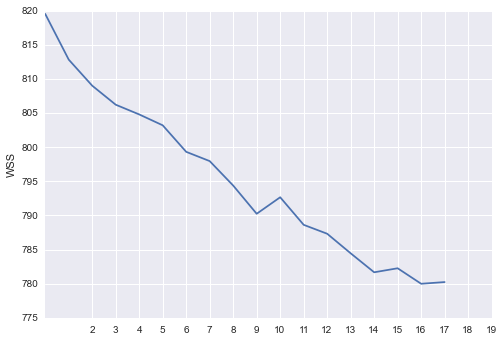

In [228]:
import matplotlib.pyplot as plt
plt.plot(plotary)
plt.ylabel('WSS')
plt.xticks(range(2,20))
plt.show()

In [188]:
a = [2,1,5,3,4]
ind =0
for i in a:
    print ind, i
    ind +=1
print '======'

for i,d in enumerate(a):
    print i,d

0 2
1 1
2 5
3 3
4 4
0 2
1 1
2 5
3 3
4 4


In [198]:
for index, g in  enumerate(k_data):
    if g == 9:
        print ary[index]


柯文哲打臉鄧家基？　北市府：兩人說法並無不同
銀行接管大巨蛋？徐旭東：沒得選擇　洪信德：必要
遠雄：市府捨博物館 再索回饋金
大巨蛋違約 銀行團接管？柯:先醞釀 先溝通
北市盼銀行團接管大巨蛋  遠雄：尊重
兆豐銀：待收到市府公文再邀參貸行會商
遠雄：違約非僅北市府單方面認定 銀行團指未獲通知
大巨蛋案 徐旭東：不影響接BOT意願
柯文哲：沒要銀行接管大巨蛋，是先通知說明溝通
接管大巨蛋？銀行團：將召開聯貸會議評估
接管大巨蛋？　銀行團：無例可循，等收到公文再說
大巨蛋由銀行團接管？柯辯：是通知銀行團先溝通
北市銀行團接管大巨蛋 遠雄：尊重銀行團
風評：銀行團接管大巨蛋？金融界都笑了！
找銀行團接管巨蛋  柯P：大底仍須完成
北市府找銀行團協商  遠雄批柯出爾反爾
接管大巨蛋 財部：尊重銀行自主判斷
巨蛋誰來接  遠雄：各有協商對象
大巨蛋銀行團接管？　遠雄尊重但批北市出爾反爾
通知接管巨蛋 銀行團如拒?柯:先醞釀 先溝通
遠雄：尊重銀行團意願
柯文哲打臉鄧家基？ 柯：不是接管 先找銀行團溝通
銀行團若無意願接手？　柯文哲：事情先蘊釀，先溝
遠雄：要建棒球博物館 市府卻要錢
大巨蛋攤牌 北市府：通知銀行團善後接管
接管大巨蛋？遠雄：尊重銀行團意願
大巨蛋攤牌 北市建議宣布由銀行團善後接管
遠雄違約確認 北市府：通知銀行團接管大巨蛋
大巨蛋逾期　北市府宣布銀行團接管
大巨蛋攤牌 銀行融資機構善後接管
快訊／大巨蛋爭議　北市府宣布：由銀行團接管
巨蛋限期改善不等了  北市府找銀行團接手
北市府宣布 通知銀行團接管大巨蛋


In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cosine_similarities)

print pca_data.shape
print pca_data

(832, 2)
[[ 0.06106733  0.04722084]
 [ 0.00352772  0.08744762]
 [ 0.8896499  -1.26658309]
 ..., 
 [ 0.08643273  0.08504375]
 [ 0.08043761  0.07744289]
 [ 0.03739672  0.08224841]]


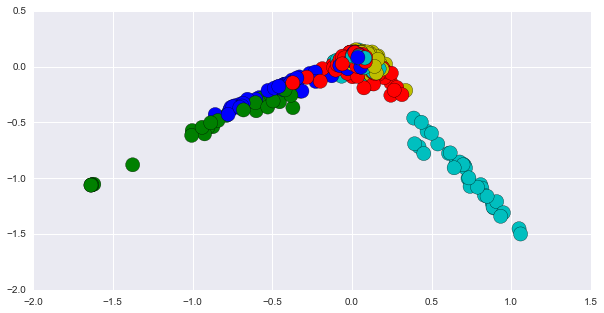

In [213]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbycrgbycrgbyc'[i] for i in k_data ], s=200)
#axes.set_title(p)

In [230]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1435449602.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()

In [ ]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse
ary = []
corpus=[]
for elem in events.findall('./channel/item'):
    title = elem.find('title').text
    description = elem.find('description').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 10, allowPOS = ['n', 'nr', 'ns'])))
'''
    ng
    nr
    nrfg
    nrt
    ns
    nt
    nz
'''    

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 


In [255]:
for ele in word:
    print ele

00
000
02
03
08
0963257119
10
100
119
13
132
15
17
1942
1998
20
200
2002
2010
2013
2015
2016
2050
21
214
22
228
23
24
25
250
26
27
28
29
30
300
3c
40
42
50
58
60
600
6000
65
70
700
a19
ad
anderson
asia
atm
a股
bb
berluti
boxing
br
bv
color
com
cup
display
div
dr
ecb
eck
ellwood
eoc
galliano
gap
givenchy
imf
innisfree
jart
john
jonathan
kabbage
kelly
knpc
lancome
led
loewe
maison
makayla
margiela
nbsp
none
opec
open
philip
plant
play
poshness
puzzle
qayrawani
qdii2
rfsu
riccardo
ryder
smcpc
strong
style
tisci
tobias
tw
van
veneta
www
一五
一個
一出
一分
一場
一套
一定
一張
一支
一時
一樓
一樣
一直
一票
一種
一級
一舉
一體性
三嚴
三拍
三重市
三間
上台
上市
上車
下台
下海
下面
不動產
不可
不同
不悅
不應
不新鮮
不斷
不能
不見
不詳
不買票
不過
不錯
不願
世代
世界
丟掉
並動員
並無希臘
中共
中喪生
中國
中國人
中國民眾
中央
中小
中山路
中心
中拉
中文
中文系
中日
中暑
中正路
中毒
中產階級
中興
中華
中華民國
中資
中選擇
丹寧
主任
主動
主席
主辦
之數
之間
之食
九二
也展
乾咳
乾淨
乾脆
乾隆
了解
事件
事務
事業
二名
二姐
二度
二氧化碳
互救
互聯網
亞攻擊
亞東
亞海灘
亟思
交談
交通
亦不例外
享用
人來
人員
人喪生
人數
人有
人氣
人獎
人生
人間
人靠
人體
什麼
今年
今生
介紹
仍待
仍然
仔細來
他們
代言人
代謝性
令人
令人尊敬
以養陽
件套
企業
伊梵帕
伍思凱
估計
低物價
低稅
低薪
住院
何必
佛跳牆
佛靠
作詞
使用
來往
供給
依

In [233]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 


In [246]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=5)
weight = tfidf.toarray() 
k_data = c.fit_predict(weight)


In [254]:
for index, g in  enumerate(k_data):
    if g == 4:
        print ary[index]


希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
觀點投書：讀中文系的人，應該反對課綱微調
觀點投書：災難中的護理人
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
八仙案  新店慈濟4傷者危急
希債協議  法國願盡最後斡旋努力
歐洲》荷蘭的稻田發電
競選總部入厝　洪慈庸期許台中煥然一新
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
金曲26／陳奕迅二度擊敗張學友　濕身奪歌王
希臘盼展延債務 歐元區拒絕
北榮33名八里傷患  2/3傷重
